## JMMY-InspanningAI
##### Project [iDBPS] Inspanning meten met AI
> Project 8 van _BD02_, Blok 3 leerjaar 3 2022.   
> Uitgevoerd door projectgroep 8 (JMMY)  
> Voor een up-to-date versie van deze pagina:  
> https://github.com/gardan4/JMMY-InspanningAI/wiki

#### De projectgroep:
* Maarten Maessen (1916580)
* Jos van Schaijk (2066107)
* Marc Meijers (1908480)
* Yorian Peters (1904507)

#### De doelstelling
De doelstelling voor dit project is om bij te dragen aan het iDBPS-project, door een AI te leveren welke in staat is om op basis van trainingsmateriaal vastgelegd aan de hand van een proces, een inspanning bij personen (welke een bepaalde test uitvoeren) te meten en categoriseren. 

Hierbij is de focus om het AI te trainen met hartslagdata en bijhorende beelden van gezichten van mensen, waarna deze op enkel de beelden van gezichten moet werken. Het proces heeft als hoofddoel om het uitvoeren van de test en verzamelen van de data normaliseren, zodat de data richting de AI uniform wordt en deze hierdoor beter presteren kan.

Always start by running the _Imports_ and the _Functions_ cells.  
The reason is simple: You don't wanna miss any imports or functions because the code won't run properly. 

### Begin hier
Begin met het runnen van deze blokken code.  
Deze zijn verantwoordelijk voor imports, setup, dependencies en andere zaken. 

In [4]:
# Imports
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt
import data_generator as dgen

print("Succes loading Imports")

Succes loading Imports


In [5]:
# Functions
def get_file_name(path):
    file_name = path[path.rfind('/') + 1:]
    # Splits out the file-type designation
    file_name, file_extension = file_name.split('.')
    return file_name
    
print("Succes loading Functions")

Succes loading Functions


### Heb je al data?
Als er al trainingsdata bestaat, schrijf dan simpelweg de filename bij het betreffende blok.  
Run anders het blok waarin de data nog word gegenereerd. 

In [6]:
"""Ik heb geen data"""
# Start here if no data has been generated.
print("\n"*3)
print("Provide the path to a video file."
      "(Example: C:/Users/admin/video/video.mp4)")
vid_path = input("Path: ")
vid_name = get_file_name(vid_path)

generator = dgen.Generator(vid_path)
generator.generate_data()

data_path = f"generateData_OUTPUT/{vid_name}_trainingsData.json"
frame_data = pd.read_json(data_path, orient='index')

print("Total Table size: ")
print(f"Rows: {frame_data.shape[0]}, Columns: {frame_data.shape[1]}")





Finished. 
Total Table size: 
Rows: 449, Columns: 478


In [ ]:
"""Ik heb al trainingsdata. """
# Start here if data has already been generated.
data_path = input("Provide the filename to a file in "
                  "the generateData_OUTPUT folder.\n"
                  "Example: perfect_example_trainingsData\n"
                  "Filename: ")

data_path = f"generateData_OUTPUT/{data_path}_trainingsData.json"
frame_data = pd.read_json(data_path, orient='index')

print("Total Table size: ")
print(f"Rows: {frame_data.shape[0]}, Columns: {frame_data.shape[1]}")

In [7]:
# Show the loaded data
frame_data.head()

,0,1,2,3,4,5,6,7,8,9,...,468,469,470,471,472,473,474,475,476,477
3,"[[0.5491871833801271, 0.391295969486236, -0.01...","[[0.548364162445068, 0.336667031049728, -0.034...","[[0.5489785075187681, 0.35090428590774503, -0....","[[0.546030938625335, 0.29657039046287503, -0.0...","[[0.548880636692047, 0.32403483986854503, -0.0...","[[0.5501191020011901, 0.30817836523056, -0.033...","[[0.553623974323272, 0.270618647336959, -0.015...","[[0.512938261032104, 0.264069944620132, 0.0154...","[[0.5557506680488581, 0.24545034766197202, -0....","[[0.556631803512573, 0.23018540441989901, -0.0...",...,"[[0.522243857383728, 0.259249567985534, 0.0105...","[[0.528186023235321, 0.259275913238525, 0.0105...","[[0.522407531738281, 0.24919967353343903, 0.01...","[[0.51625907421112, 0.259245306253433, 0.01057...","[[0.522013783454895, 0.269306182861328, 0.0105...","[[0.5882324576377861, 0.26951783895492504, 0.0...","[[0.594506502151489, 0.27069824934005704, 0.00...","[[0.58922928571701, 0.260023415088653, 0.00298...","[[0.5821238756179811, 0.268286526203155, 0.002...","[[0.587299108505249, 0.27920591831207203, 0.00..."
4,"[[0.5498752593994141, 0.390927076339721, -0.02...","[[0.5502600669860841, 0.338173598051071, -0.03...","[[0.55055946111679, 0.351902186870574, -0.0186...","[[0.5479247570037841, 0.29697540402412403, -0....","[[0.5508759617805481, 0.32533985376358004, -0....","[[0.5521077513694761, 0.30906543135643, -0.033...","[[0.555536448955535, 0.27051082253456105, -0.0...","[[0.513563692569732, 0.263503670692443, 0.0162...","[[0.557400345802307, 0.24408859014511103, -0.0...","[[0.5582952499389641, 0.22836485505104, -0.010...",...,"[[0.523173689842224, 0.25934898853302, 0.01138...","[[0.52925169467926, 0.259725332260131, 0.01138...","[[0.5232862830162041, 0.249101653695106, 0.011...","[[0.517053484916687, 0.25895199179649303, 0.01...","[[0.5230136513710021, 0.269518852233886, 0.011...","[[0.5878331065177911, 0.269645929336547, 0.004...","[[0.594223201274871, 0.27101930975914, 0.00410...","[[0.5888462066650391, 0.25939035415649403, 0.0...","[[0.5816656947135921, 0.26818588376045205, 0.0...","[[0.586882591247558, 0.28008407354354803, 0.00..."
5,"[[0.549878776073455, 0.39088332653045604, -0.0...","[[0.549435436725616, 0.337787300348281, -0.034...","[[0.5499526858329771, 0.35162132978439303, -0....","[[0.54739886522293, 0.2967529296875, -0.023970...","[[0.5500581860542291, 0.324999541044235, -0.03...","[[0.551407694816589, 0.308814406394958, -0.033...","[[0.555203735828399, 0.270449489355087, -0.015...","[[0.5138006210327141, 0.263620018959045, 0.016...","[[0.557198226451873, 0.24375165998935702, -0.0...","[[0.558129370212554, 0.22784599661827, -0.0112...",...,"[[0.523025751113891, 0.259147852659225, 0.0115...","[[0.528685331344604, 0.259521543979644, 0.0115...","[[0.5233302116394041, 0.24894917011260903, 0.0...","[[0.5173129439353941, 0.258769005537033, 0.011...","[[0.522672057151794, 0.26931264996528603, 0.01...","[[0.588460803031921, 0.26959431171417203, 0.00...","[[0.59494948387146, 0.270887285470962, 0.00310...","[[0.589360773563385, 0.259322732686996, 0.0031...","[[0.5821735858917231, 0.26821219921112, 0.0031...","[[0.58761042356491, 0.28003379702568004, 0.003..."
6,"[[0.55051451921463, 0.390761911869049, -0.0194...","[[0.549595952033996, 0.337898433208465, -0.034...","[[0.550222396850585, 0.35145574808120705, -0.0...","[[0.547612845897674, 0.297026276588439, -0.023...","[[0.550192177295684, 0.32525518536567605, -0.0...","[[0.551566123962402, 0.309109479188919, -0.033...","[[0.55546349287033, 0.270659893751144, -0.0153...","[[0.514220535755157, 0.263771891593933, 0.0165...","[[0.5574599504470821, 0.243890732526779, -0.01...","[[0.558360457420349, 0.22800114750862102, -0.0...",...,"[[0.523137331008911, 0.258869469165802, 0.0113...","[[0.5289180278778071, 0.259171545505523, 0.011...","[[0.5234329104423521, 0.24887733161449402, 0.0...","[[0.5173324346542351, 0.258565068244934, 0.011...","[[0.522796750068664, 0.268854022026062, 0.0113...","[[0.588915

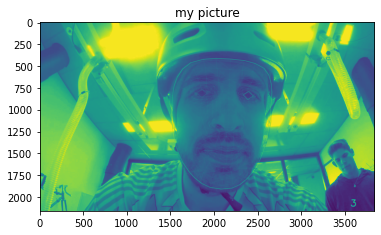

In [7]:
# CODE BY MARC!
df[0]

cap = cv2.VideoCapture("generateData_OUTPUT/GOPR1124_Trim_trainingsData.mp4") #video_name is the video being called
cap.set(1,2); # Where frame_no is the frame you want

ret, frame = cap.read() # Read the frame
gray = cv2.cvtColor(frame, cv2.COLOR_BAYER_BG2BGR)

plt.imshow(gray)
plt.title('my picture')
plt.show()